In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 

SVC()

In [4]:
X

array([[-1, -1],
       [-2, -1],
       [ 1,  1],
       [ 2,  1]])

In [5]:
clf.decision_function(X)

array([-1.00006256, -0.99980785,  0.99993521,  0.99993521])

In [6]:
from sklearn.datasets import make_blobs

In [7]:
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)

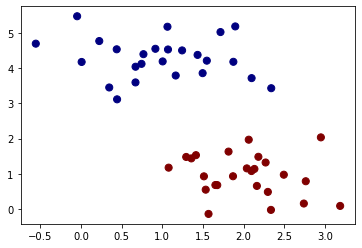

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

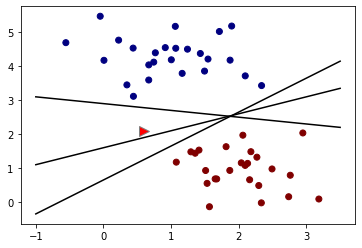

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='jet')
plt.plot([0.6], [2.1], '>', markeredgecolor='grey', color='red', markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

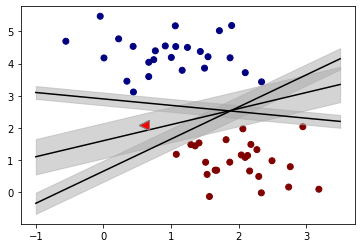

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='jet')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, color='k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.5)
    plt.plot([0.6], [2.1], '<', markeredgecolor='grey', color='red', markersize=10)

## Fitting a support vector machine

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC(kernel='linear', C=1E10)

In [13]:
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    X1, Y1 = np.meshgrid(x, y)
    xy = np.vstack([X1.ravel(), Y1.ravel()]).T
    P = model.decision_function(xy).reshape(X1.shape)
    ax.contour(X1,Y1, P, colors='k',levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support is None:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, facecolor='none', linewidth=1, edgecolor='red')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

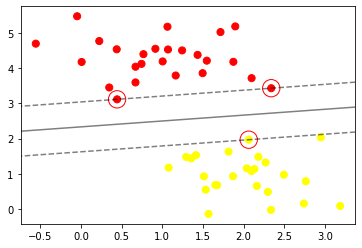

In [15]:
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

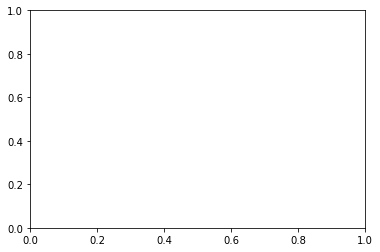

In [16]:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)


In [17]:
Y, X = np.meshgrid(y, x)

In [26]:
np.vstack([X.ravel(), Y.ravel()]).T.shape

(900, 2)

In [27]:
model.decision_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape).shape

(30, 30)

In [28]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [29]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
    
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4) 
    ax.set_ylim(-1, 6) 
    plot_svc_decision_function(model, ax)

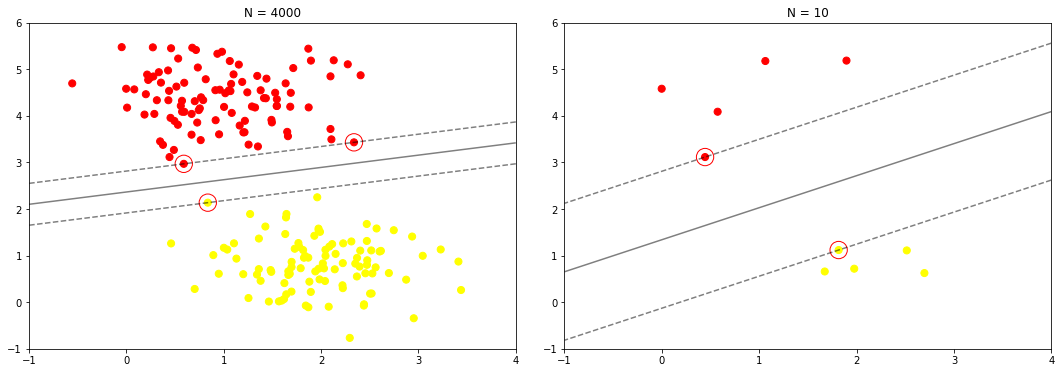

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, N in enumerate([4000, 10]):
    plot_svm(N, ax[i])
    ax[i].set_title('N = {0}'.format(N))

In [31]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,100,200,500], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 100, 200, 500), value=10), Output()), _dom_classe…

<function __main__.plot_svm(N=10, ax=None)>

## Beyond linear boundaries: Kernel SVM

In [32]:
from sklearn.datasets import make_circles

In [33]:
X, y = make_circles(1000, noise=.1, factor=.1)

In [34]:
clf = SVC(kernel='linear').fit(X, y)

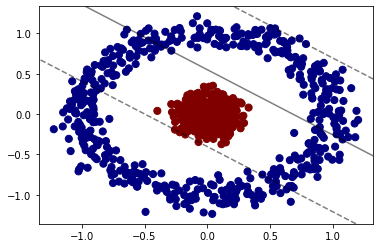

In [35]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='jet')
plot_svc_decision_function(clf, plot_support=False)

In [36]:
r = np.exp(-(X ** 2).sum(1))

In [37]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'r')

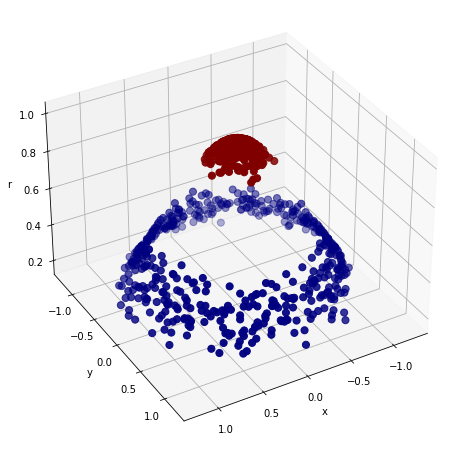

In [38]:
ax = plt.axes(projection='3d')
fig = plt.gcf()
fig.set_size_inches(16,8)
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='jet', s=50)
ax.view_init(34, 60) 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_zlabel('r')

In [39]:
def plot3d(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='viridis', s=50)
    ax.view_init(elev=elev, azim=azim) 
    ax.set_xlabel('x') 
    ax.set_ylabel('y') 
    ax.set_zlabel('r')

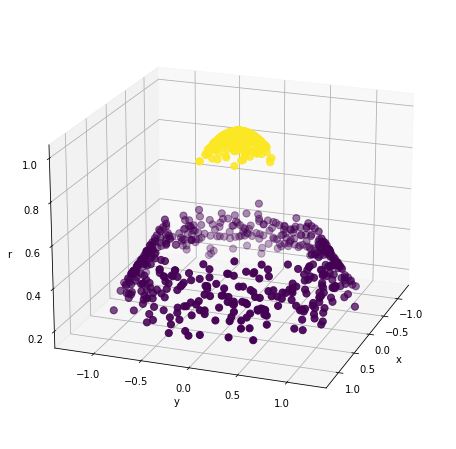

In [40]:
plot3d(20,20,X,y)

In [41]:
interact(plot3d, elev=[30, 45, 60,90], azip=(-180, 180),X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(30, 45, 60, 90), value=30), IntSlider(value=30, de…

<function __main__.plot3d(elev=30, azim=30, X=array([[ 0.06195952, -0.06378436],
       [ 0.07240996, -0.12785298],
       [-0.078908  ,  0.82476658],
       ...,
       [-0.57099108,  0.62023705],
       [-0.12227989, -0.05301613],
       [-0.02082047, -0.04337013]]), y=array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0

In [42]:
rbf = SVC(kernel='rbf', C=1E10).fit(X,y)

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param = [{'C':[1E10, 2E10, 3E10], 'gamma':[0.001, 0.002,0.05, 0.1, 0.2], 'kernel':['rbf']}]

In [45]:
grid = GridSearchCV(SVC(), param , cv=7, scoring='accuracy')
grid

GridSearchCV(cv=7, estimator=SVC(),
             param_grid=[{'C': [10000000000.0, 20000000000.0, 30000000000.0],
                          'gamma': [0.001, 0.002, 0.05, 0.1, 0.2],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [46]:
grid.fit(X,y)
grid.best_params_

{'C': 10000000000.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [47]:
new_rbf = SVC(kernel='rbf', gamma=0.001, C=10000000000.0)
new_rbf.fit(X,y)

SVC(C=10000000000.0, gamma=0.001)

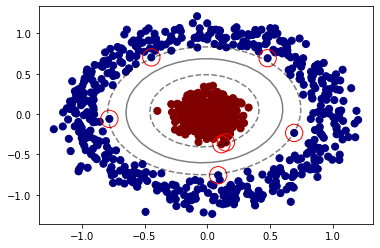

In [48]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap='jet', s=50)
plot_svc_decision_function(new_rbf)

## Tuning the SVM: Softening margins

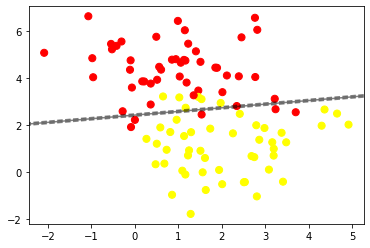

In [49]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
model3 = SVC(kernel='linear', C=10000000).fit(X,y)
plot_svc_decision_function(model3, plot_support=False)

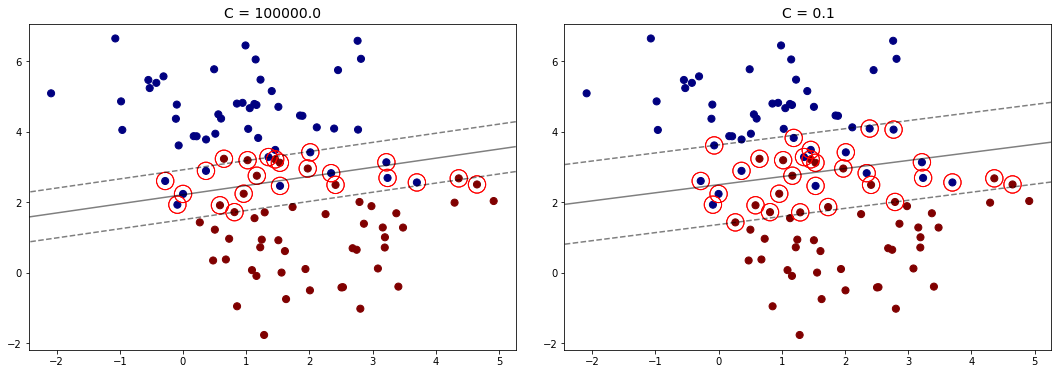

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, C in enumerate([100000, 0.1]):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    model2 = SVC(kernel='linear', C=C).fit(X,y)
    plot_svc_decision_function(model2,ax[i])
    ax[i].scatter(model2.support_vectors_[:,0], model2.support_vectors_[:,1], facecolor='none', edgecolor='red', linewidth=1, s=300)
    ax[i].set_title('C = {0:.1f}'.format(C), size=14)

### Example: Face Recognition

In [51]:
from sklearn.datasets import fetch_lfw_people

In [52]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [53]:
faces.data.shape

(1348, 2914)

In [54]:
faces.target[138]


3

In [55]:
faces.target_names[3]

'George W Bush'

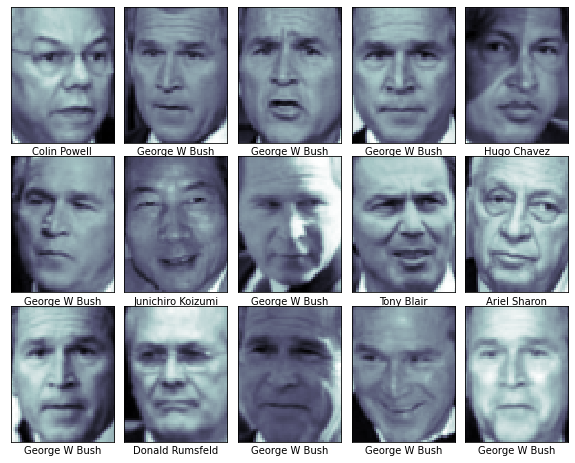

In [56]:
fig, axes = plt.subplots(3,5, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw= dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='bone', interpolation='nearest')
    ax.set_xlabel(faces.target_names[faces.target[i]])

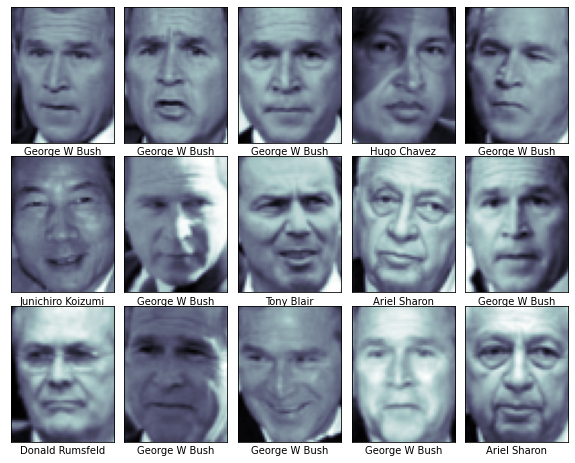

In [57]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1, 16):
    ax = fig.add_subplot(3,5,i)
    ax.imshow(faces.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[], xlabel = faces.target_names[faces.target[i]])

In [58]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [59]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [60]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target)

In [61]:
params = [{'svc__C':[1, 5, 10, 50],
           'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}]

In [62]:
Grid = GridSearchCV(model, params, cv=10, scoring='accuracy')

In [63]:
Grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid=[{'svc__C': [1, 5, 10, 50],
                          'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}],
             scoring='accuracy')

In [64]:
Grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [65]:
svc1 = SVC(kernel='rbf', C=5, gamma=0.005)

In [66]:
model2 = make_pipeline(pca, svc1)

In [67]:
model3 = Grid.best_estimator_

In [68]:
model2.fit(Xtrain, ytrain)
yfit = model2.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

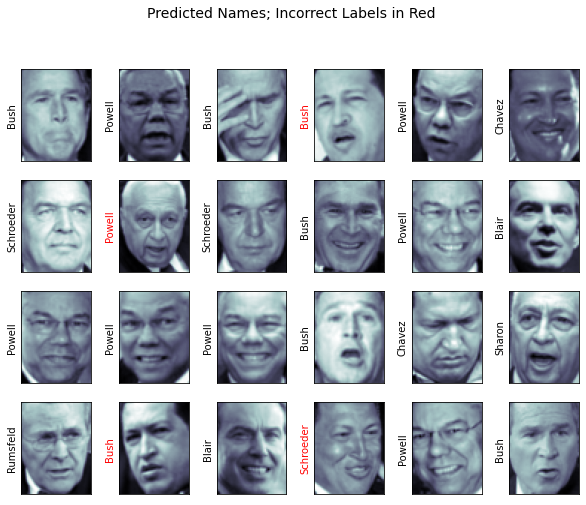

In [69]:
fig, axes = plt.subplots(4, 6, figsize=(10,8), subplot_kw = {'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.4))
for i , ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    ax.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [70]:
from sklearn.metrics import classification_report

In [71]:
Xtest.data.shape

(337, 2914)

In [72]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [73]:
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.63      0.75        19
     Colin Powell       0.85      0.87      0.86        71
  Donald Rumsfeld       0.83      0.79      0.81        24
    George W Bush       0.79      0.97      0.87       128
Gerhard Schroeder       0.91      0.71      0.80        28
      Hugo Chavez       1.00      0.59      0.74        17
Junichiro Koizumi       1.00      0.67      0.80        15
       Tony Blair       0.93      0.80      0.86        35

         accuracy                           0.85       337
        macro avg       0.90      0.75      0.81       337
     weighted avg       0.86      0.85      0.84       337



In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

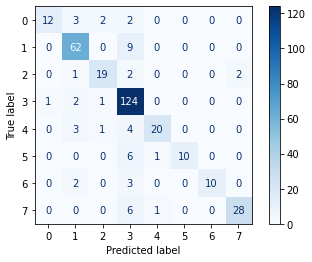

In [75]:
plot_confusion_matrix(model2, Xtest, ytest, values_format='d', cmap='Blues')

In [691]:
mat = confusion_matrix(yfit, ytest)
import seaborn as sns

Text(91.68, 0.5, 'predicted label')

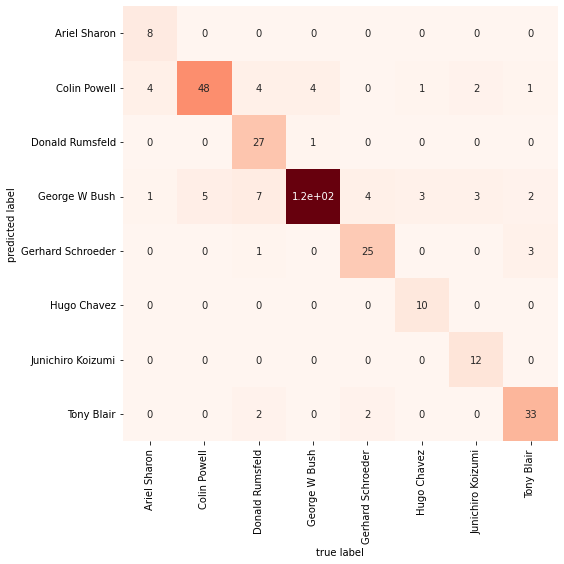

In [704]:
sns.heatmap(mat, annot=True, square=True, cbar=False, cmap='Reds', xticklabels = faces.target_names, yticklabels=faces.target_names)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xlabel('true label') 
plt.ylabel('predicted label')